Ejemplo para utilizar la matriz de confusión por clase

by rcamargo-202404

In [12]:
import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [57]:
# definimos clase y campos de la tabla de valores
Clase = 3
YClass = 'Id_class'
YVal = 'Id_val'

In [58]:

url ='https://drive.google.com/file/d/1aMJVAcxlE76I8b4KhGStL3qAYgMb1zdH/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&confirm=1&id='+url.split('/')[-2]
df=pd.read_csv(path)
df.head()


,Nro,Id_class,Id_val
0,1,3,3.0
1,2,3,3.0
2,3,3,12.0
3,4,3,NaN
4,5,6,3.0


In [59]:
# limpiamos los datos y seleccionamos los valores
dfSel =  df[df[YClass]==Clase].dropna()
dfSel = pd.concat([dfSel,df[df[YVal]==Clase].dropna()])

dfSel = dfSel.assign(y_class = lambda x: (x[YClass]==Clase))
dfSel = dfSel.assign(y_val = lambda x:(x[YVal]==Clase))

y_class = dfSel['y_class']
y_val = dfSel['y_val']


# corremos la matriz de confusion
matriz = confusion_matrix(y_class, y_val)
print('La matriz de consufión para la clase %g es: ' % (Clase))
print(matriz)

La matriz de consufión para la clase 3 es: 
[[0 4]
 [5 8]]


In [62]:
dfSel.head(10)

,Nro,Id_class,Id_val,y_class,y_val
0,1,3,3.0,True,True
1,2,3,3.0,True,True
2,3,3,12.0,True,False
21,22,3,6.0,True,False
22,23,3,6.0,True,False
23,24,3,6.0,True,False
27,28,3,3.0,True,True
28,29,3,6.0,True,False
29,30,3,3.0,True,True
0,1,3,3.0,True,True


In [37]:
# importamos las librerias para graficar
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve #para obtener datos de una curva ROC
from sklearn.metrics import auc #para calcular el área AUC
import seaborn as sns

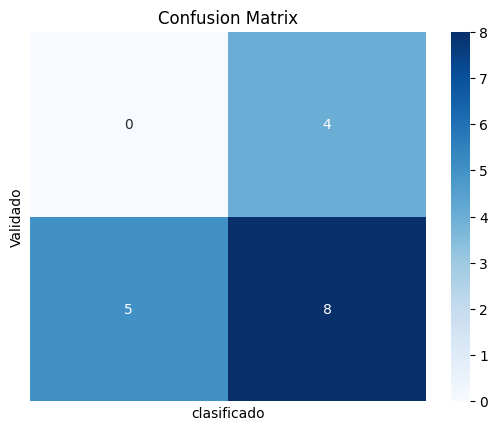

In [61]:
# graficamos los resultados

sns.heatmap(matriz, annot=True, cmap='Blues', fmt='d', xticklabels='', yticklabels='')
plt.xlabel('clasificado')
plt.ylabel('Validado')
plt.title('Confusion Matrix')
plt.show()



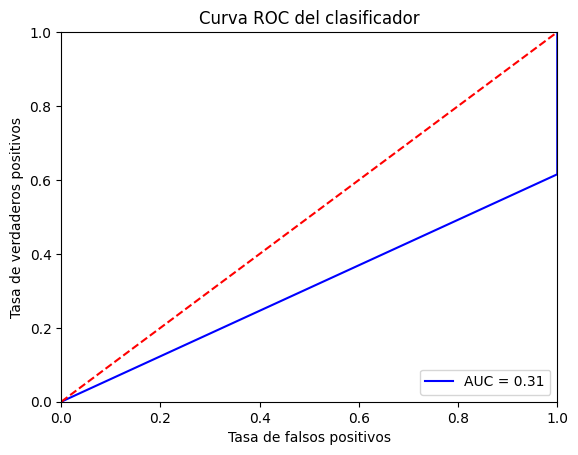

In [63]:
tfp, tvp, umbral = roc_curve(y_class, y_val) #tfp = 1 - especificidad, tvp = recall
roc_auc = auc(tfp, tvp)

plt.plot(tfp, tvp, 'b', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.title('Curva ROC del clasificador')
plt.show()

In [43]:
print(umbral)

[2 1 0]
